### Decision Tree 

Decision Tree (DT) is a supervised learning method used for classification and regression.


Classification trees are used when dependent variable is categorical


Regression trees are used when dependent variable is continuous


The goal of a decision tree is to split our data into groups such that every element in one group belongs to the same category.

<img src='images/dt.PNG' width='60%' height='60%' />

<img src='images/dt2.PNG' />

### An Important concept is how informative a split of data is..

<img src='images/dt3.PNG' width='80%' height='80%' />

<img src='images/gini.png'/>

### There are number of mathematical ways to compute the best split ..

### but widely used method is Gini index

### So decision tree algorithm starts by finding the feature that leads to the most informative split

<img src='images/dt4.PNG' width='80%' height='80%' />

<img src='images/dt5.PNG' width='80%' height='80%'/>

<img src='images/ginni.png'>

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()
X = iris.data
Y = iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Ytest = train_test_split(X,Y, test_size=.20,
                                                  random_state=1)

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [5]:
print("Training Score: ", clf.score(X_train, Y_train))
print("Testing Score: ", clf.score(X_test, Ytest))

Training Score:  1.0
Testing Score:  0.9666666666666667


In [6]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
clf.feature_importances_

array([0.        , 0.03133487, 0.57201197, 0.39665316])

In [8]:
import matplotlib.pyplot as plt
plt.bar(iris.feature_names,clf.feature_importances_)
plt.show()

### So here we can say our model is overfitted..,

Decision trees may get overfitted when they produce large, complicated decision trees that perfectly fit every training instance but fail to generalize the real relationship between unseen data


Pruning is a technique in machine learning that reduces the size of decision trees by removing sections of the tree that provide little power to classify instances. Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.

<img src='images/dt6.PNG' width='80%' height='80%'/>

In [9]:
X = iris.data[:,2:]
Y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Ytest = train_test_split(X,Y, test_size=.20,
                                                  random_state=1)

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, Y_train)

print("Training Score: ", clf1.score(X_train, Y_train))
print("Testing Score: ", clf1.score(X_test, Ytest))

Training Score:  0.9916666666666667
Testing Score:  0.9666666666666667


In [10]:
clf1.feature_importances_

array([0.59660534, 0.40339466])

### Visualizing decision trees

In [11]:
# pip install graphviz
#pip install pydotplus

In [12]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(clf, out_file=None, 
                          feature_names=iris.feature_names,
                          class_names=iris.target_names,
                          rounded=True,filled=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_png('custom_tree.png')


True

In [13]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(clf1, out_file=None, 
                          feature_names=iris.feature_names[2:],
                          class_names=iris.target_names,
                          rounded=False,filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_png('tree.png')


True

### feature importance

In [14]:
import pandas as pd

<AxesSubplot:>

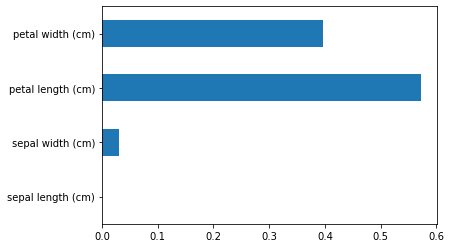

In [15]:
pd.Series(clf.feature_importances_, index=iris.feature_names).plot(kind='barh')

<AxesSubplot:>

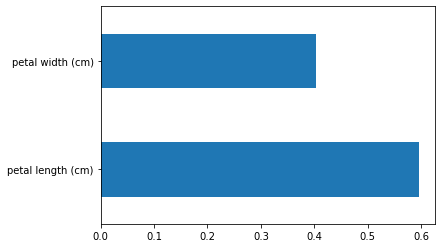

In [16]:
pd.Series(clf1.feature_importances_, index=iris.feature_names[2:]).plot(kind='barh')

<img src='images/f1.PNG' width='80%' height='80%' />